In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# reading the CSV raw data thorugh pandas
df_rest = pd.read_csv(r'C:/Users/naman/Downloads/DMDDA3/DMDDA3/Restaurants/Input_US_Restauarants.csv')
df_rest.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu
0,135 Prime,1201 Hewitt Dr,"Waco, TX","American, Steakhouse, Seafood",4.5 of 5 bubbles,200 reviews,GPS could not get us properly vectored. When ...,+1 254-666-3100,https://www.tripadvisor.com//Restaurant_Review...,NaN
1,144 Restaurant and Lounge,14402 135th Ave,"Jamaica, NY","American, Bar, Vegetarian Friendly",4 of 5 bubbles,241 reviews,On our way to Italy and staying at the Hilton ...,+1 718-659-0200,https://www.tripadvisor.com//Restaurant_Review...,NaN
2,15 Church Restaurant,15 Church St,"Saratoga Springs, NY","American, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,821 reviews,"My husband and I absolutely love the food, the...",+1 518-587-1515,https://www.tripadvisor.com//Restaurant_Review...,https://www.15churchrestaurant.com/saratoga-sp...
3,18 Oaks,23808 Resort Parkway,"San Antonio, TX","American, Steakhouse, Gluten Free Options",4.5 of 5 bubbles,350 reviews,This was my 3rd time here for brunch and I wil...,+1 210-491-5825,https://www.tripadvisor.com//Restaurant_Review...,NaN
4,1848 BBQ,5 Avalon Dr,"Brownsville, TX","American, Barbecue",4.5 of 5 bubbles,13 reviews,Their sliced brisket sandwich was amazing!! Li...,+1 956-504-1848,https://www.tripadvisor.com//Restaurant_Review...,NaN


In [3]:
# data cleaning for restaurant data
df_rest['City'] = df_rest.apply(lambda row: row['Location'].split(',')[0],axis=1)
df_rest['State'] = df_rest.apply(lambda row: row['Location'].split(',')[1],axis=1)
df_rest['Reviews'] = df_rest.apply(lambda row: row['Reviews'].split('of')[0],axis=1)
df_rest['No of Reviews'] = df_rest.apply(lambda row: row['No of Reviews'].split(' ')[0],axis=1)
df_rest = df_rest.drop('Location', axis=1)
df_rest['Reviews'] = df_rest['Reviews'].replace('No review',0.0)
df_rest.head(2)

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,City,State
0,135 Prime,1201 Hewitt Dr,"American, Steakhouse, Seafood",4.5,200,GPS could not get us properly vectored. When ...,+1 254-666-3100,https://www.tripadvisor.com//Restaurant_Review...,NaN,Waco,TX
1,144 Restaurant and Lounge,14402 135th Ave,"American, Bar, Vegetarian Friendly",4,241,On our way to Italy and staying at the Hilton ...,+1 718-659-0200,https://www.tripadvisor.com//Restaurant_Review...,NaN,Jamaica,NY


In [4]:
# basic information for dataframe
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              2890 non-null   object
 1   Street Address    2890 non-null   object
 2   Type              2879 non-null   object
 3   Reviews           2890 non-null   object
 4   No of Reviews     2890 non-null   object
 5   Comments          2290 non-null   object
 6   Contact Number    2890 non-null   object
 7   Trip_advisor Url  2890 non-null   object
 8   Menu              759 non-null    object
 9   City              2890 non-null   object
 10  State             2890 non-null   object
dtypes: object(11)
memory usage: 248.5+ KB


In [5]:
# Treating the reviews column for consistency
df_rest['No of Reviews'] = df_rest['No of Reviews'].str.replace(',','')
df_rest['No of Reviews'] = df_rest['No of Reviews'].replace('Undefined Number',0)
df_rest['No of Reviews'] = df_rest['No of Reviews'].replace('Undefined',0)
df_rest['No of Reviews'] = df_rest['No of Reviews'].replace(np.nan, 0)

In [6]:
# Treating comment field for consistency
df_rest['Comments'] = df_rest['Comments'].fillna('No comments')

In [7]:
# Treating menu field for consistency
df_rest['Menu'] = df_rest['Menu'].fillna('Check The Website for a Menu')

In [8]:
# dictionary for data type modifications
dict_dtype = {
    'Name':str,
    'Street Address':str,
    'Type':str,
    'Reviews':float,
    'No of Reviews':int,
    'Comments':str,
    'Contact Number':str,
    'Trip_advisor Url':str,
    'Menu':str,
    'City':str,
    'State':str
}

# iterating the dictionary keys to change datatypes as per the required format
for key in dict_dtype.keys():
    df_rest[key] = df_rest[key].astype(dict_dtype[key])

In [9]:
# verifying datatypes for each column after transformation
df_rest.dtypes

Name                 object
Street Address       object
Type                 object
Reviews             float64
No of Reviews         int32
Comments             object
Contact Number       object
Trip_advisor Url     object
Menu                 object
City                 object
State                object
dtype: object

In [10]:
# describe the data to understand the distriution
df_rest.describe()

,Reviews,No of Reviews
count,2890.000000,2890.000000
mean,4.323356,301.064360
std,0.284340,403.944862
min,0.000000,0.000000
25%,4.000000,90.000000
50%,4.500000,188.000000
75%,4.500000,343.000000
max,5.000000,5448.000000


In [11]:
# checking nulls in data
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2890 non-null   object 
 1   Street Address    2890 non-null   object 
 2   Type              2890 non-null   object 
 3   Reviews           2890 non-null   float64
 4   No of Reviews     2890 non-null   int32  
 5   Comments          2890 non-null   object 
 6   Contact Number    2890 non-null   object 
 7   Trip_advisor Url  2890 non-null   object 
 8   Menu              2890 non-null   object 
 9   City              2890 non-null   object 
 10  State             2890 non-null   object 
dtypes: float64(1), int32(1), object(9)
memory usage: 237.2+ KB


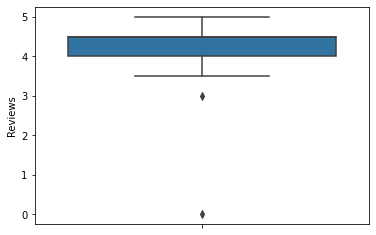

In [12]:
# box plot for ratings in data
sns.boxplot(y="Reviews", data=df_rest);

Text(0.5, 1.0, 'Restaurants Count Percentage by City in USA')

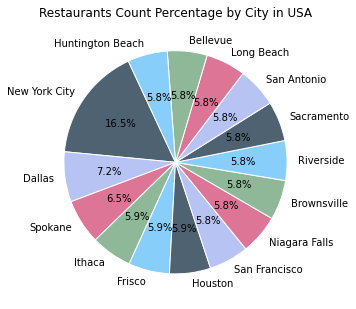

In [14]:
# Get restaurants count for each city
city_group = df_rest.groupby("City").count()
# Reset index
city_group = city_group.reset_index()
# Create new dataframe for city name and restaurant count
city_group = city_group[["City", "Name"]]
# Rename columns
city_group.rename(columns={"Name": "Restaurants Count"}, inplace=True)
restaurants_by_city = city_group.sort_values(by=['Restaurants Count'], ascending=False).iloc[:15,:]

# Create pie chart for hotel count by city
restaurants_count = restaurants_by_city["Restaurants Count"]
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#87CEFA']
city_labels = restaurants_by_city["City"]
plt.figure(figsize=(5,9))
plt.pie(restaurants_count, labels=city_labels, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors, startangle=115, autopct="%1.1f%%")
plt.title("Restaurants Count Percentage by City in USA")

In [93]:
# writing the output file
df_rest.to_csv(r'/Users/dipikam/Desktop/Output_US_Restaurants.csv')